# Differential Expression Analysis using edgeR
using the alignment data from STAR

In [1]:
#Extension for R magic
%load_ext rpy2.ipython

In [21]:
%%R
setwd("/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data")

samples <- list.files("gene_counts_DESeq")
print(samples)

 [1] "ERR950158_trimmed.counts.txt"        
 [2] "ERR950158_trimmed.counts.txt.summary"
 [3] "ERR950159_trimmed.counts.txt"        
 [4] "ERR950159_trimmed.counts.txt.summary"
 [5] "ERR950160_trimmed.counts.txt"        
 [6] "ERR950160_trimmed.counts.txt.summary"
 [7] "ERR950161_trimmed.counts.txt"        
 [8] "ERR950161_trimmed.counts.txt.summary"
 [9] "ERR950162_trimmed.counts.txt"        
[10] "ERR950162_trimmed.counts.txt.summary"
[11] "ERR950163_trimmed.counts.txt"        
[12] "ERR950163_trimmed.counts.txt.summary"
[13] "ERR950177_trimmed.counts.txt"        
[14] "ERR950177_trimmed.counts.txt.summary"
[15] "ERR950178_trimmed.counts.txt"        
[16] "ERR950178_trimmed.counts.txt.summary"
[17] "ERR950179_trimmed.counts.txt"        
[18] "ERR950179_trimmed.counts.txt.summary"
[19] "ERR950180_trimmed.counts.txt"        
[20] "ERR950180_trimmed.counts.txt.summary"
[21] "ERR950181_trimmed.counts.txt"        
[22] "ERR950181_trimmed.counts.txt.summary"
[23] "ERR950182_trimmed.counts.t

# Counts per gene for one test sample

In [5]:
%%bash

# Set variables
gtf_file="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/human_genome/Homo_sapiens.GRCh38.113.gtf"
output_dir="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST"
bam_file="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/alignment_STAR_subset/ERR950158_trimmed_Aligned.sortedByCoord.out.bam"
output_file="$output_dir/ERR950158_htseq_counts.txt"

# Create output directory if it does not exist
mkdir -p "$output_dir"

# Sort BAM file by name for htseq-count
sorted_bam_file="$output_dir/ERR950158_sorted.bam"
samtools sort -n -o "$sorted_bam_file" "$bam_file"

# Run htseq-count
htseq-count -f bam -r name -s no -t exon -i gene_id "$sorted_bam_file" "$gtf_file" > "$output_file" 2> "$output_dir/htseq-count.log"

# Check if htseq-count ran successfully
if [ $? -eq 0 ]; then
    echo "htseq-count completed successfully. Output saved in $output_file"
else
    echo "htseq-count failed. Check log file at $output_dir/htseq-count.log" >&2
    exit 1
fi

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950158_htseq_counts.txt


# Counts per gene for the entire subset

In [ ]:
%%bash

# Set variables
gtf_file="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/human_genome/Homo_sapiens.GRCh38.113.gtf"
output_dir="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST"
aligned_dir="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/alignment_STAR_subset/"

# Create output directory if it does not exist
mkdir -p "$output_dir"


# Loop through BAM files
for bam_file in ${aligned_dir}/*sortedByCoord.out.bam; do
    # Extract sample name
    SAMPLE=$(basename "$bam_file" _Aligned.sortedByCoord.out.bam)
    
    # Define output files
    sorted_bam_file="$output_dir/${SAMPLE}_sorted.bam"
    output_file="$output_dir/${SAMPLE}_htseq_counts.txt"
    log_file="$output_dir/${SAMPLE}_htseq-count.log"

    # Sort BAM file by name for htseq-count
    samtools sort -n -o "$sorted_bam_file" "$bam_file"

    # Check if samtools sort was successful
    if [ $? -ne 0 ]; then
        echo "Error: samtools sort failed for $bam_file" >&2
        continue
    fi

    # Run htseq-count
    htseq-count -f bam -r name -s no -t exon -i gene_id "$sorted_bam_file" "$gtf_file" > "$output_file" 2> "$log_file"

    # Check if htseq-count ran successfully
    if [ $? -eq 0 ]; then
        echo "htseq-count completed successfully. Output saved in $output_file"
    else
        echo "htseq-count failed for $bam_file. Check log file at $log_file" >&2
        echo "htseq-count log:"
        cat "$log_file"
    fi

done

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950158_trimmed_htseq_counts.txt
htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950159_trimmed_htseq_counts.txt
htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950160_trimmed_htseq_counts.txt
htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950161_trimmed_htseq_counts.txt
htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950162_trimmed_htseq_counts.txt
htseq-count completed successfully. Output saved in /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/ERR950163_trimmed_htseq_counts.tx

# Move sample_sorted.bam and htseq-count_log file into a subdirectory

In [1]:
%%bash

count_dir="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST"
sub_dir_count="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/sub_dir_count"

mkdir -p "$sub_dir_count"

# Move BAM and log files to the sub-directory
for file in "$count_dir"/*_sorted.bam "$count_dir"/*.log; do
    if [ -e "$file" ]; then  # Check if the file exists
        mv "$file" "$sub_dir_count/"
    fi
done

echo "Files moved successfully to $sub_dir_count"


/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


Files moved successfully to /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/sub_dir_count


# Creating a count table with genes

In [2]:
%%bash

# Define input directory containing the count files
input_dir="/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST"

# Define output file
output_file="$input_dir/merged_counts.txt"

# Get list of count files
count_files=("$input_dir"/*_trimmed_htseq_counts.txt)

# Check if there are count files
if [ ${#count_files[@]} -eq 0 ]; then
    echo "Error: No count files found in $input_dir" >&2
    exit 1
fi

# Use the first file as a reference to check gene consistency
first_file="${count_files[0]}"
awk '{print $1}' "$first_file" | sort > /tmp/gene_list_reference.txt

# Merge files based on first column
awk -v ref_file="/tmp/gene_list_reference.txt" '
    BEGIN { OFS="\t"; while ((getline < ref_file) > 0) ref_genes[$1] = 1; close(ref_file) }
    FNR==1 { files++ }  # Track number of files
    {
        gene_id = $1
        count = $2
        if (!(gene_id in ref_genes)) {
            print "Error: Gene " gene_id " is missing from one or more files!" > "/dev/stderr"
            exit 1
        }
        counts[gene_id, FILENAME] = count
        genes[gene_id]  # Store unique gene IDs
    }
    END {
        # Print header
        printf "Gene_ID"
        for (i in ARGV) {
            if (ARGV[i] ~ /_trimmed_htseq_counts.txt$/) {
                sample_name = ARGV[i]
                sub(".*/", "", sample_name)  # Remove path
                sub("_trimmed_htseq_counts.txt", "", sample_name)  # Extract sample ID
                printf "\t%s", sample_name
            }
        }
        print ""

        # Print merged counts
        for (gene in genes) {
            split(gene, arr, SUBSEP)
            printf "%s", arr[1]  # Print gene ID
            for (i in ARGV) {
                if (ARGV[i] ~ /_trimmed_htseq_counts.txt$/) {
                    file = ARGV[i]
                    printf "\t%s", (counts[arr[1], file] ? counts[arr[1], file] : 0)
                }
            }
            print ""
        }
    }
' "${count_files[@]}" > "$output_file"

echo "Merged file saved as: $output_file"


/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


Merged file saved as: /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST/merged_counts.txt


In [2]:
%%R

setwd("/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/CN_gene_counts_TEST")
gene_count_table = read.table('merged_counts.txt', header=TRUE, stringsAsFactors=FALSE)
head(gene_count_table)

          Gene_ID ERR950160 ERR950180 ERR950178 ERR950163 ERR950162 ERR950159
1 ENSG00000302920         0         0         0         0         0         0
2 ENSG00000302638         0         0         1         0         0         0
3 ENSG00000287685         0         0         0         0         0         0
4 ENSG00000277202         0         1         0         0         0         0
5 ENSG00000267470         2         0         1         1         1         1
6 ENSG00000264808         0         0         1         0         0         0
  ERR950181 ERR950158 ERR950161 ERR950182 ERR950179 ERR950177 ERR950186
1         0         0         0         0         0         0         0
2         0         0         0         0         0         0         0
3         0         0         0         0         0         0         0
4         0         0         0         0         0         0         0
5         0         2         2         0         0         0         1
6         0         0 

In [3]:
%%R

setwd("/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_gene_counts")
gene_count_table = read.table('merged_counts.txt', header=TRUE, stringsAsFactors=FALSE)
head(gene_count_table)

          Gene_ID ERR950160 ERR950180 ERR950178 ERR950163 ERR950162 ERR950159
1 ENSG00000302920         0         0         0         0         0         0
2 ENSG00000302638         9         1         3         3         2         0
3 ENSG00000287685         0         0         0         0         0         0
4 ENSG00000277202         1         2         7         3         0         1
5 ENSG00000267470        80        70        79        52        46        51
6 ENSG00000264808         8         4         4         5        11         4
  ERR950181 ERR950158 ERR950161 ERR950182 ERR950179 ERR950177 ERR950187
1         0         0         0         0         0         0         0
2         2         5         4         2         0         6         5
3         0         0         0         0         0         0         0
4         1         2         9         1         1         0         1
5        42       115       104        43        35        54        36
6         4         5 

# edgeR 

In [1]:
import rpy2.robjects as robjects

r_edger_script = """
library(edgeR)                                              

# Load count matrix
count_matrix <- read.table("data/STAR_DE_analysis/STAR_merged_counts.txt", header = TRUE, sep = "\t", row.names=1)
metadata <- read.table("data/STAR_DE_analysis/STAR_metadata.txt", header = TRUE)

# Convert to numeric matrix
count_matrix <- as.matrix(count_matrix)
mode(count_matrix) <- "numeric"

# Set row names for metadata
rownames(metadata) <- metadata$Sample_ID

# Ensure Diagnosis is a factor with correct levels
metadata$Diagnosis <- factor(metadata$Diagnosis, levels = c("Atr", "Hp"))

# Find common samples in both metadata and count matrix
samples <- intersect(rownames(metadata), colnames(count_matrix))
count_matrix <- count_matrix[, samples]
metadata <- metadata[samples, , drop = FALSE]

# Create DGEList object
dge <- DGEList(counts = count_matrix, group = metadata$Diagnosis)

# Filter low-expressed genes
keep <- filterByExpr(dge, group = metadata$Diagnosis)
dge <- dge[keep, , keep.lib.sizes=FALSE]

# Normalize for library size
dge <- calcNormFactors(dge)

# Create design matrix
design <- model.matrix(~metadata$Diagnosis)

# Estimate dispersion
dge <- estimateDisp(dge, design)

# Fit the GLM model
fit <- glmFit(dge, design)

# Perform differential expression test (Likelihood Ratio Test)
lrt <- glmLRT(fit, coef=2)  

# Extract results
results <- topTags(lrt, n=Inf)$table

# Save results
write.csv(results, "STAR.edgeR_results.csv")
"""

# Run edgeR inside Python
robjects.r(r_edger_script)


R[write to console]: Loading required package: limma



<rpy2.rinterface_lib.sexp.NULLType object at 0x148ad97f37d0> [0]

In [ ]:
import pandas as pd
import statsmodels.stats.multitest as smm

# Load results
DESeq2_STAR_results = pd.read_csv("STAR.edgeR_results.csv")

# Ensure correct column name
if "FDR" not in DESeq2_STAR_results.columns:
    raise ValueError("Column 'FDR' not found in input file. Check column names.")

# Drop NaN values in FDR column
DESeq2_STAR_results = DESeq2_STAR_results.dropna(subset=["FDR"])

# Convert to float to ensure compatibility
pvals = DESeq2_STAR_results["FDR"].astype(float)

# Apply FDR correction
significant, corrected_pvals = smm.fdrcorrection(pvals, alpha=0.05, method='indep', is_sorted=False)

# Add corrected values to dataframe
DESeq2_STAR_results["FDR_corrected_padj"] = corrected_pvals
DESeq2_STAR_results["Significant"] = significant

# Sort results by corrected p-value
DESeq2_STAR_filtered_results = DESeq2_STAR_results.sort_values("FDR_corrected_padj", ascending=True)

# Print significant genes
print(DESeq2_STAR_filtered_results.loc[DESeq2_STAR_filtered_results["FDR"] <= 0.05])

# Count number of significant genes
print(len(DESeq2_STAR_filtered_results[DESeq2_STAR_filtered_results["Significant"] == True]))

# Testing if the order of the sample IDs in the metadata file matters

In [20]:
%%bash
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis/

order=(
    "ERR950160"
    "ERR950180"
    "ERR950178"
    "ERR950163"
    "ERR950162"
    "ERR950159"
    "ERR950181"
    "ERR950158"
    "ERR950161"
    "ERR950182"
    "ERR950179"
    "ERR950177"
    "ERR950187"
    "ERR950186"
)

# Print the header
head -n 1 STAR_metadata_2.txt > reordered_STAR_metadata_2.txt

# Print the rows in the specified order
for sample in "${order[@]}"; do
    grep -P "$sample" STAR_metadata_2.txt >> reordered_STAR_metadata_2.txt
done

echo "Reordered matrix saved as reordered_matrix.txt"

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


Reordered matrix saved as reordered_matrix.txt


# EdgeR clean code
Frågor:
- Är det rätt att the står logCPM när det är TMM jag använt? Nej?
- Hur vad ändrar jag de till istället?
- Hur ser jag hur många gener som filtreras bort?
- Under inlämning i förra kursen så gjorde vi logCPM på varje gen för varje sample och plottade PCA men här verkar vi ha bara ha en column för logCPM? Borde vi inte har 14 (en för varje sample)?

In [14]:
#Extension for R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
%%R
#set working directory
setwd("/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork")

In [16]:
%%R

library(edgeR)                                              

# Load count matrix
count_matrix <- read.table("data/STAR_DE_analysis/STAR_merged_counts.txt", header = TRUE, sep = "\t", row.names=1)
metadata <- read.table("data/STAR_DE_analysis/reordered_STAR_metadata_2.txt", header = TRUE)

# Convert to numeric matrix
count_matrix <- as.matrix(count_matrix)
mode(count_matrix) <- "numeric"

# Set row names for metadata
rownames(metadata) <- metadata$Sample_ID

# Ensure Diagnosis is a factor with correct levels
metadata$Diagnosis <- factor(metadata$Diagnosis, levels = c("Hp", "Atr"))

# Find common samples in both metadata and count matrix
samples <- intersect(rownames(metadata), colnames(count_matrix))
count_matrix <- count_matrix[, samples]
metadata <- metadata[samples, , drop = FALSE]

In [17]:
%%R
# Create DGEList object
dge <- DGEList(counts = count_matrix, group = metadata$Diagnosis)
str(dge)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 2
  .. ..$ : num [1:78937, 1:14] 0 9 0 1 80 8 11 2 0 18 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:78937] "ENSG00000302920" "ENSG00000302638" "ENSG00000287685" "ENSG00000277202" ...
  .. .. .. ..$ : chr [1:14] "ERR950160" "ERR950180" "ERR950178" "ERR950163" ...
  .. ..$ :'data.frame':	14 obs. of  3 variables:
  .. .. ..$ group       : Factor w/ 2 levels "Hp","Atr": 2 2 1 2 2 2 2 2 2 2 ...
  .. .. ..$ lib.size    : num [1:14] 29126741 30734625 25029565 22330233 35700840 ...
  .. .. ..$ norm.factors: num [1:14] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ names: chr [1:2] "counts" "samples"


In [18]:
%%R
#Removes genes with low sequencing depth
keep <- filterByExpr(dge, group = metadata$Diagnosis)
dge <- dge[keep, , keep.lib.sizes=FALSE]
print(head(keep))
print(head(dge))
print(min(rowSums(dge$counts)))

ENSG00000302920 ENSG00000302638 ENSG00000287685 ENSG00000277202 ENSG00000267470 
          FALSE           FALSE           FALSE           FALSE            TRUE 
ENSG00000264808 
          FALSE 
An object of class "DGEList"
$counts
                ERR950160 ERR950180 ERR950178 ERR950163 ERR950162 ERR950159
ENSG00000267470        80        70        79        52        46        51
ENSG00000215277        18        15         9        11        12        12
ENSG00000186106       226       262       192       162        51       124
ENSG00000177469       272       312       171       155       112       127
ENSG00000297667        11        16         1         9         9         0
ENSG00000262902         5        25        26        11        48        16
                ERR950181 ERR950158 ERR950161 ERR950182 ERR950179 ERR950177
ENSG00000267470        42       115       104        43        35        54
ENSG00000215277        16        17        32        19        13         2
ENSG000

In [19]:
%%R
# Normalize for library size
dge <- calcNormFactors(dge, method = "TMM")
head(dge)
#Did it do anything??? YES IT DID!!!

An object of class "DGEList"
$counts
                ERR950160 ERR950180 ERR950178 ERR950163 ERR950162 ERR950159
ENSG00000267470        80        70        79        52        46        51
ENSG00000215277        18        15         9        11        12        12
ENSG00000186106       226       262       192       162        51       124
ENSG00000177469       272       312       171       155       112       127
ENSG00000297667        11        16         1         9         9         0
ENSG00000262902         5        25        26        11        48        16
                ERR950181 ERR950158 ERR950161 ERR950182 ERR950179 ERR950177
ENSG00000267470        42       115       104        43        35        54
ENSG00000215277        16        17        32        19        13         2
ENSG00000186106       218       294       250       197       140       318
ENSG00000177469       279       548       239       160       136       228
ENSG00000297667        11        22        28      

In [20]:
%%R
# Create design matrix
design <- model.matrix(~metadata$Diagnosis)
print(design)

   (Intercept) metadata$DiagnosisAtr
1            1                     1
2            1                     1
3            1                     0
4            1                     1
5            1                     1
6            1                     1
7            1                     1
8            1                     1
9            1                     1
10           1                     1
11           1                     0
12           1                     0
13           1                     0
14           1                     0
attr(,"assign")
[1] 0 1
attr(,"contrasts")
attr(,"contrasts")$`metadata$Diagnosis`
[1] "contr.treatment"



In [21]:
%%R
dgeGLMcomDisp <- estimateGLMCommonDisp(dge, design, verbose = TRUE)
dgeGLMtrendDisp <- estimateGLMTrendedDisp(dgeGLMcomDisp, design)
dgeGLMtagDisp <- estimateGLMTagwiseDisp(dgeGLMtrendDisp, design)


Disp = 0.14393 , BCV = 0.3794 


In [22]:
%%R 
png("edgeR_isp_plot.png")
plotBCV(dgeGLMtagDisp)
dev.off()

png 
  2 


In [23]:
%%R
fit <- glmFit(dgeGLMtagDisp, design)
colnames(coef(fit))
lrt <- glmLRT(fit, coef=2)
print(topTags(lrt))
#DO not how this is different from lrt, but youtube guy did this
ttGlm <- topTags(lrt, n = Inf)

Coefficient:  metadata$DiagnosisAtr 
                    logFC    logCPM       LR       PValue          FDR
ENSG00000163735  7.332286 2.3141024 79.11865 5.848966e-19 1.213368e-14
ENSG00000152785 -4.599698 0.9788388 61.85099 3.704566e-15 3.842561e-11
ENSG00000145113  5.534458 4.9167642 57.83927 2.844349e-14 1.736834e-10
ENSG00000269404  5.299666 1.4261483 57.51805 3.348921e-14 1.736834e-10
ENSG00000115009  4.641912 0.9423925 55.35402 1.006636e-13 4.176534e-10
ENSG00000211893  4.231580 6.3952812 53.80965 2.208851e-13 7.369580e-10
ENSG00000211897  4.504578 6.5352922 53.57685 2.486722e-13 7.369580e-10
ENSG00000163518  5.583194 1.0892041 52.14318 5.159767e-13 1.337992e-09
ENSG00000117152 -2.410319 0.6592392 48.44409 3.398417e-12 7.275526e-09
ENSG00000148346  3.106764 4.5268695 48.38234 3.507123e-12 7.275526e-09


In [24]:
%%R
# Prints a summary significance tests
print(summary(deGLM <- decideTestsDGE(lrt, p = 0.05, adjust = "fdr")))

       metadata$DiagnosisAtr
Down                     417
NotSig                 18885
Up                      1443


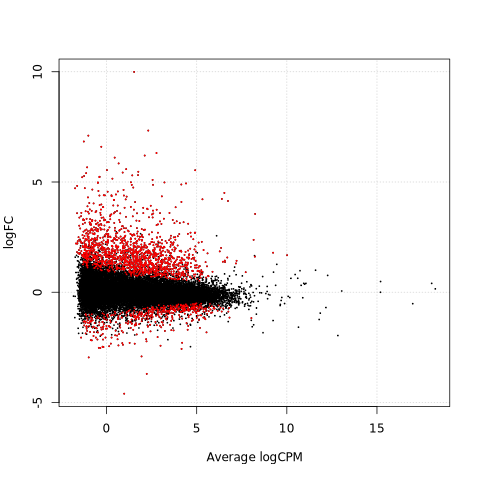

In [25]:
%%R
#All the genes which are differentially expressed
tagsGLM <- rownames(dgeGLMtagDisp)[as.logical(deGLM)]
plotSmear(lrt, de.tags = tagsGLM)


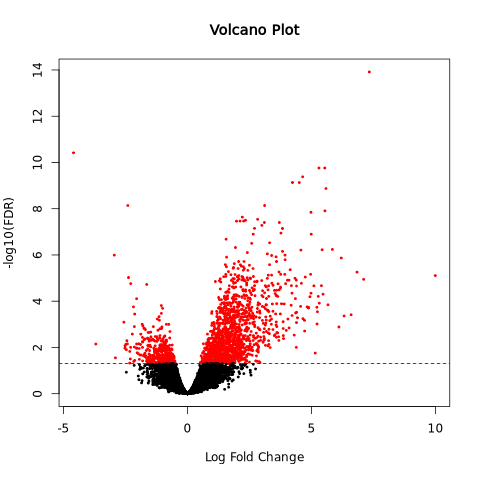

In [26]:
%%R 
# Extract results table from the likelihood ratio test (lrt)
results <- topTags(lrt, n = Inf)$table
#png("EdgeR_volcano_plot.png")
# Create a volcano plot
plot(results$logFC, -log10(results$FDR), 
     col = ifelse(results$FDR < 0.05, "red", "black"),  # Color significant genes red
     pch = 20, cex = 0.6,                              # Smaller points
     xlab = "Log Fold Change", ylab = "-log10(FDR)", 
     main = "Volcano Plot")

# Add a significance threshold line (FDR = 0.05)
abline(h = -log10(0.05), col = "blue", lty = 2)


In [27]:
%%R

DE_genes <- ttGlm$table[ttGlm$table$FDR < 0.05, ]

write.csv(DE_genes, "STAR_edgeR_Results.csv")

In [28]:
%%bash
#moves STAR_edgeR_Results.csv into the STAR_DE_analysis directory
group_dir='/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/'
STAR_DE_analysis_dir='/cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis'
mv $group_dir/STAR_edgeR_Results.csv $STAR_DE_analysis_dir/STAR_edgeR_Results.csv 

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


In [29]:
%%R
head(results)

                    logFC    logCPM       LR       PValue          FDR
ENSG00000163735  7.332286 2.3141024 79.11865 5.848966e-19 1.213368e-14
ENSG00000152785 -4.599698 0.9788388 61.85099 3.704566e-15 3.842561e-11
ENSG00000145113  5.534458 4.9167642 57.83927 2.844349e-14 1.736834e-10
ENSG00000269404  5.299666 1.4261483 57.51805 3.348921e-14 1.736834e-10
ENSG00000115009  4.641912 0.9423925 55.35402 1.006636e-13 4.176534e-10
ENSG00000211893  4.231580 6.3952812 53.80965 2.208851e-13 7.369580e-10


# Comparing DE genes DESeq2 vs edgeR

In [61]:
%%bash
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis
sed -i 's/"//g' STAR_DESeq2_Results.csv
sed -i 's/"//g' STAR_edgeR_Results.csv

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


In [62]:
%%bash
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis
sed -i 's/,/\t/g' STAR_DESeq2_Results.csv
sed -i 's/,/\t/g' STAR_edgeR_Results.csv

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


In [30]:
%%bash
grep -P 'ENSG' STAR_DESeq2_Results.csv | awk '{print $1}' > STAR_DESeq2_Res_Gene_ID
grep -P 'ENSG' STAR_edgeR_Results.csv | awk '{print $1}' > STAR_edgeR_Res_Gene_ID
grep -Fxf STAR_DESeq2_Res_Gene_ID.txt STAR_edgeR_Res_Gene_ID.txt > STAR_common_gene_ID.txt

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory
grep: STAR_DESeq2_Results.csv: No such file or directory
grep: STAR_edgeR_Results.csv: No such file or directory
grep: STAR_DESeq2_Res_Gene_ID.txt: No such file or directory


CalledProcessError: Command 'b"grep -P 'ENSG' STAR_DESeq2_Results.csv | awk '{print $1}' > STAR_DESeq2_Res_Gene_ID\ngrep -P 'ENSG' STAR_edgeR_Results.csv | awk '{print $1}' > STAR_edgeR_Res_Gene_ID\ngrep -Fxf STAR_DESeq2_Res_Gene_ID.txt STAR_edgeR_Res_Gene_ID.txt > STAR_common_gene_ID.txt\n"' returned non-zero exit status 2.

In [ ]:
%%bash
# Number of common DE genes
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis
grep -Fxf STAR_DESeq2_Res_Gene_ID.txt STAR_edgeR_Res_Gene_ID.txt | wc -l

In [ ]:
%%bash 
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis
grep -c 'ENSG' STAR_DESeq2_Res_Gene_ID.txt
grep -c 'ENSG' STAR_edgeR_Res_Gene_ID.txt

# PCA

In [30]:
%%R
column.cols=c("purple","red")[as.factor(metadata$Diagnosis)]

log_counts = log(dge$counts + 1) 
dge_pca = prcomp(t(log_counts))
print(summary(dge_pca))
head(dge_pca$x)

PC1 = dge_pca$x[,1]
PC2 = dge_pca$x[,2]
PC3 = dge_pca$x[,3]


#plots are colored according to diagnosis
png("USE_EdgeR_PCA_PC1_PC2.png")
PC1.vs.PC2 = plot(PC1,PC2,main='PC1 vs PC2 colored according to diagnosis',xlab = "PC1: 46% variance", ylab = "PC2: 21% variance" , col=column.cols)
#PC1.vs.PC3 = plot(PC1,PC3,main='PC1 vs PC3 colored according to diagnosis',col=column.cols)
#PC2.vs.PC3 = plot(PC2,PC3,main='PC2 vs PC3 colored according to diagnosis',col=column.cols)

legend("bottomleft", legend = c("Hp", "Atr"),  col = c("purple", "red"), pch = 19, cex = 0.8, title = "Group")
dev.off()

Importance of components:
                           PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     60.8502 41.4613 24.21939 19.05180 17.84877 16.37725
Proportion of Variance  0.4577  0.2125  0.07251  0.04487  0.03938  0.03315
Cumulative Proportion   0.4577  0.6702  0.74271  0.78758  0.82696  0.86011
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     15.15183 13.73179 13.45428 12.55499 11.95509 10.98474
Proportion of Variance  0.02838  0.02331  0.02238  0.01948  0.01767  0.01492
Cumulative Proportion   0.88849  0.91180  0.93417  0.95366  0.97133  0.98624
                           PC13      PC14
Standard deviation     10.54997 4.763e-14
Proportion of Variance  0.01376 0.000e+00
Cumulative Proportion   1.00000 1.000e+00
png 
  2 


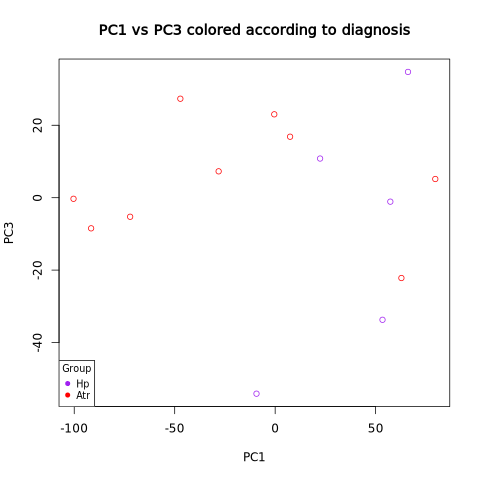

In [38]:
%%R
#png("EdgeR_PCA_PC1_PC3.png")
PC1.vs.PC3 = plot(PC1,PC3,main='PC1 vs PC3 colored according to diagnosis',xlab = "PC1: 46% variance", ylab = "PC3: 7% variance", col=column.cols)
legend("bottomleft", legend = c("Hp", "Atr"),  col = c("purple", "red"), pch = 19, cex = 0.8, title = "Group")
#dev.off()

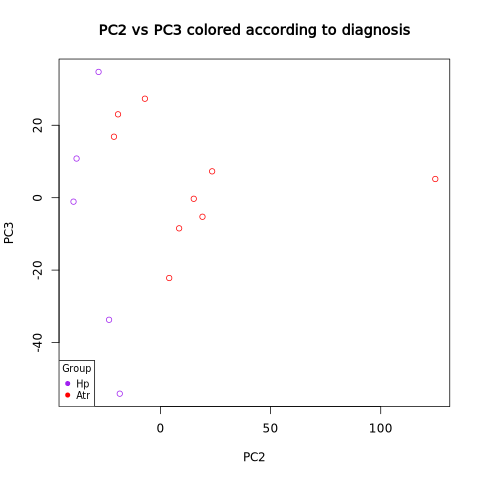

In [47]:
%%R
#png("EdgeR_PCA_PC2_PC3.png")
PC2.vs.PC3 = plot(PC2,PC3,main='PC2 vs PC3 colored according to diagnosis',col=column.cols)
legend("bottomleft", legend = c("Hp", "Atr"),  col = c("purple", "red"), pch = 19, cex = 0.8, title = "Group")
#dev.off()

In [40]:
%%bash
#Fixing the metadata file
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis
in2csv Patient-info.xlsx > Patient-info.csv
head Patient-info.csv


/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory
/opt/conda/lib/python3.11/site-packages/agate/utils.py:272: UnnamedColumnWarning: Column 1 has no name. Using "b".
  warn_unnamed_column(i, new_value)
/opt/conda/lib/python3.11/site-packages/agate/utils.py:272: UnnamedColumnWarning: Column 2 has no name. Using "c".
  warn_unnamed_column(i, new_value)
/opt/conda/lib/python3.11/site-packages/agate/utils.py:272: UnnamedColumnWarning: Column 3 has no name. Using "d".
  warn_unnamed_column(i, new_value)
/opt/conda/lib/python3.11/site-packages/agate/utils.py:272: UnnamedColumnWarning: Column 4 has no name. Using "e".
  warn_unnamed_column(i, new_value)
/opt/conda/lib/python3.11/site-packages/agate/utils.py:272: UnnamedColumnWarning: Column 5 has no name. Using "f".
  warn_unnamed_column(i, new_value)


Table 1. Subjects included in the study.,b,c,d,e,f
HEALF* ID,RNA-seq ID,Age,Sex,H. pylori isolate**,Atrophy score RNA-seq***
HEALF19432,Hp-1,47,M,,Low
,,,,,
HEALF24260,Hp-2,34,F,,Low
,,,,,
HEALF23836,Hp-3,54,F,,High
,,,,,
HEALF04977,Hp-4,23,M,,Low
,,,,,


In [41]:
%%bash
cd /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis
grep -P 'HEAL' Patient-info.csv | cut -d',' -f2-4 | sed 's/,/\t/g' | grep -P '(Hp|Atr)' > /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis/METAFANSKAPET/META_1.txt

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


In [5]:
%%bash
awk -F'\t' '$4 ~ /(Hp|Atr)/ {print $1, $4}' /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/RNA-seq-list.txt > /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis/METAFANSKAPET/META_2.txt

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


In [33]:
T
while read -r sample condition; do
    # Find matching condition in file2.txt
    metadata=$(grep -P "^$condition\t" "$file2")
    
    # If match found, append to output file
    if [[ ! -z "$metadata" ]]; then
        echo -e "$sample\t$metadata" >> "$output_file"
    fi
done < "$file1"

# Print success message
echo "Merging complete. Output saved to $output_file"

/usr/share/lmod/lmod/init/bash: /usr/share/lmod/lmod/libexec/addto: /usr/bin/lua: bad interpreter: No such file or directory


Merging complete. Output saved to /cephyr/NOBACKUP/groups/bbt045_2025/groups/group_Bjork/data/STAR_DE_analysis/META_TODO.txt


In [34]:
%%R
#Nice to have
column.cols=c("purple","red")[as.factor(metadata$Sex)]

log_counts = log(dge$counts + 1) 
dge_pca = prcomp(t(log_counts))
print(summary(dge_pca))
head(dge_pca$x)

PC1 = dge_pca$x[,1]
PC2 = dge_pca$x[,2]
PC3 = dge_pca$x[,3]


#plots are colored according to diagnosis
png("SATAN_USE_EdgeR_PCA_Sex_PC1_PC2.png")
PC1.vs.PC2 = plot(PC1,PC2,main='PC1 vs PC2 colored according to Sex', xlab = "PC1: 46% variance", ylab = "PC2: 21% variance", col=column.cols)
#PC1.vs.PC3 = plot(PC1,PC3,main='PC1 vs PC3 colored according to Sex',col=column.cols)
#PC2.vs.PC3 = plot(PC2,PC3,main='PC2 vs PC3 colored according to Sex',col=column.cols) #lägg till variance

legend("bottomleft", legend = c("Female", "Male"),  col = c("purple", "red"), pch = 19, cex = 0.8, title = "Group")
dev.off()

Importance of components:
                           PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     60.8502 41.4613 24.21939 19.05180 17.84877 16.37725
Proportion of Variance  0.4577  0.2125  0.07251  0.04487  0.03938  0.03315
Cumulative Proportion   0.4577  0.6702  0.74271  0.78758  0.82696  0.86011
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     15.15183 13.73179 13.45428 12.55499 11.95509 10.98474
Proportion of Variance  0.02838  0.02331  0.02238  0.01948  0.01767  0.01492
Cumulative Proportion   0.88849  0.91180  0.93417  0.95366  0.97133  0.98624
                           PC13      PC14
Standard deviation     10.54997 4.763e-14
Proportion of Variance  0.01376 0.000e+00
Cumulative Proportion   1.00000 1.000e+00
png 
  2 


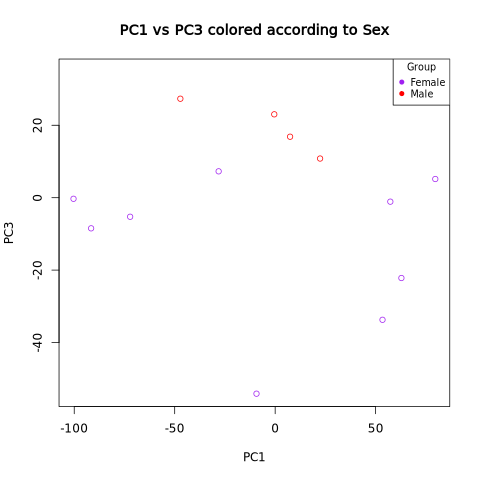

In [44]:
%%R
#png("EdgeR_PCA_Sex_PC1_PC3.png")
PC1.vs.PC3 = plot(PC1,PC3,main='PC1 vs PC3 colored according to Sex',col=column.cols)
legend("topright", legend = c("Female", "Male"),  col = c("purple", "red"), pch = 19, cex = 0.8, title = "Group")
#dev.off()

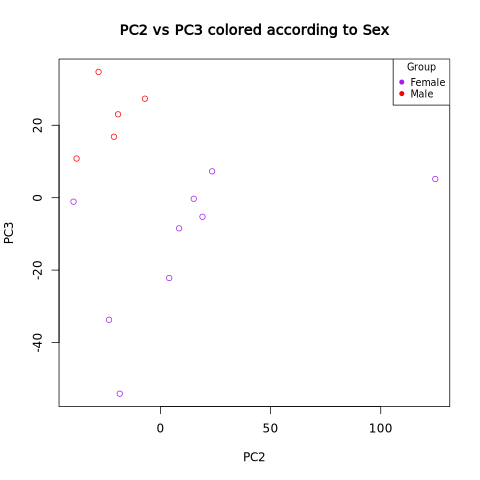

In [45]:
%%R
#png("EdgeR_PCA_Sex_PC2_PC3.png")
PC2.vs.PC3 = plot(PC2,PC3,main='PC2 vs PC3 colored according to Sex', xlab = "PC1: 46% variance", ylab = "PC3: 7% variance", col=column.cols) #lägg till variance

legend("topright", legend = c("Female", "Male"),  col = c("purple", "red"), pch = 19, cex = 0.8, title = "Group")
#dev.off()